In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'D:/googleplaystore.csv'  
google_play_data = pd.read_csv(file_path)

In [3]:
google_play_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
google_play_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Check for missing values in each column
missing_values = google_play_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [6]:
# 1. Handle Missing Values
# Fill missing 'Rating' values with the median rating
google_play_data['Rating'].fillna(google_play_data['Rating'].median(), inplace=True)

# Fill missing 'Type' and 'Content Rating' with their mode
google_play_data['Type'].fillna(google_play_data['Type'].mode()[0], inplace=True)
google_play_data['Content Rating'].fillna(google_play_data['Content Rating'].mode()[0], inplace=True)

# Drop rows with missing 'Current Ver' and 'Android Ver'
google_play_data.dropna(subset=['Current Ver', 'Android Ver'], inplace=True)

In [7]:
# Check for duplicates in the dataset
duplicate_rows = google_play_data.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

Duplicate Rows: 483


In [8]:
# 2. Remove Duplicates
google_play_data.drop_duplicates(inplace=True)

In [9]:
# Get unique values in categorical columns for understanding their diversity
unique_categories = google_play_data['Category'].unique()
unique_content_ratings = google_play_data['Content Rating'].unique()
unique_types = google_play_data['Type'].unique()

print("Unique Categories:", unique_categories[:10])  # Only print first 10 for brevity
print("\nUnique Content Ratings:", unique_content_ratings)
print("\nUnique Types:", unique_types)

Unique Categories: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT']

Unique Content Ratings: ['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']

Unique Types: ['Free' 'Paid']


In [10]:
# Summarize numerical columns (like Rating)
numerical_summary = google_play_data.describe()
print("Numerical Summary:\n", numerical_summary)

Numerical Summary:
              Rating
count  10347.000000
mean       4.203779
std        0.485707
min        1.000000
25%        4.100000
50%        4.300000
75%        4.500000
max        5.000000


In [11]:
# 3. Clean and Convert Data
# Remove non-numeric characters from 'Installs' and convert to integer
google_play_data['Installs'] = google_play_data['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Convert 'Reviews' to integer
google_play_data['Reviews'] = google_play_data['Reviews'].astype(int)

# Remove '$' from 'Price' and convert to float
google_play_data['Price'] = google_play_data['Price'].str.replace('$', '').astype(float)

<ipython-input-11-0f952a2bc078>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  google_play_data['Installs'] = google_play_data['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
<ipython-input-11-0f952a2bc078>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  google_play_data['Price'] = google_play_data['Price'].str.replace('$', '').astype(float)


In [12]:
# Standardize 'Size' by replacing 'M', 'k', and handling 'Varies with device'
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '')) * 1024  # Convert MB to KB
    elif 'k' in size:
        return float(size.replace('k', ''))
    else:
        return np.nan  # For 'Varies with device'

google_play_data['Size'] = google_play_data['Size'].replace('Varies with device', np.nan)
google_play_data['Size'] = google_play_data['Size'].str.replace('M', '').str.replace('k', '').astype(str).apply(convert_size)

In [13]:
# Fill missing sizes with the median size
google_play_data['Size'].fillna(google_play_data['Size'].median(), inplace=True)

# Convert 'Last Updated' to datetime format
google_play_data['Last Updated'] = pd.to_datetime(google_play_data['Last Updated'])

In [14]:
# 4. Address Outliers
# Cap 'Rating' at 5 (as ratings typically range from 1 to 5)
google_play_data['Rating'] = google_play_data['Rating'].clip(upper=5)

# Remove invalid 'Category' value (e.g., '1.9')
google_play_data = google_play_data[google_play_data['Category'] != '1.9']

# Verify the cleaning steps
google_play_data.info()
google_play_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10347 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10347 non-null  object        
 1   Category        10347 non-null  object        
 2   Rating          10347 non-null  float64       
 3   Reviews         10347 non-null  int32         
 4   Size            0 non-null      float64       
 5   Installs        10347 non-null  int32         
 6   Type            10347 non-null  object        
 7   Price           10347 non-null  float64       
 8   Content Rating  10347 non-null  object        
 9   Genres          10347 non-null  object        
 10  Last Updated    10347 non-null  datetime64[ns]
 11  Current Ver     10347 non-null  object        
 12  Android Ver     10347 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 1.0+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,NaN,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,NaN,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,NaN,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,NaN,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,NaN,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


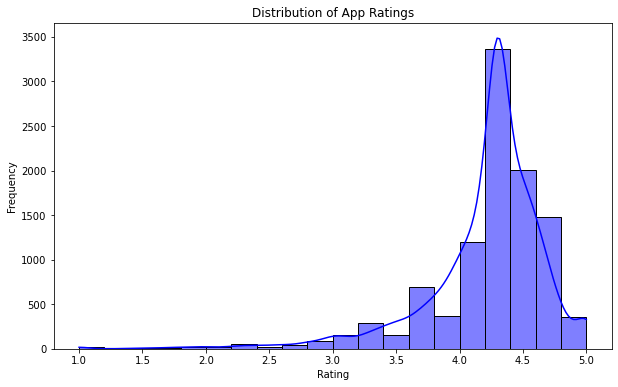

In [15]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(google_play_data['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

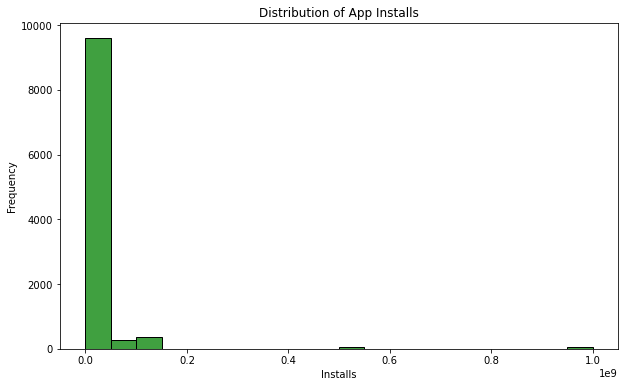

In [16]:
# Distribution of Installs
plt.figure(figsize=(10, 6))
sns.histplot(google_play_data['Installs'], bins=20, kde=False, color='green')
plt.title('Distribution of App Installs')
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.show()

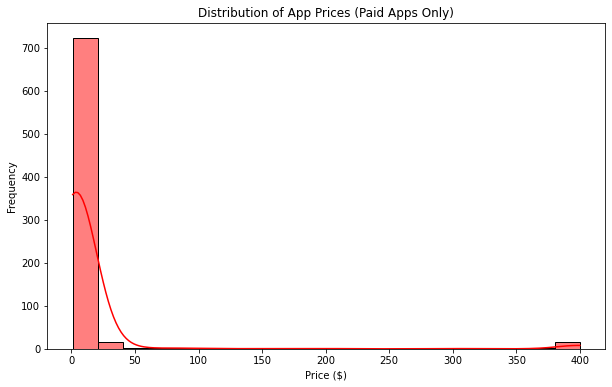

In [17]:
# Distribution of Prices (Paid Apps Only)
plt.figure(figsize=(10, 6))
sns.histplot(google_play_data[google_play_data['Price'] > 0]['Price'], bins=20, kde=True, color='red')
plt.title('Distribution of App Prices (Paid Apps Only)')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Top Categories by App Count
category_counts = google_play_data['Category'].value_counts()

# Average ratings by category
avg_rating_by_category = google_play_data.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# Display the results
print("Top Categories by App Count:\n", category_counts.head())
print("\nAverage Ratings by Category:\n", avg_rating_by_category.head())

Top Categories by App Count:
 FAMILY      1940
GAME        1121
TOOLS        841
BUSINESS     427
MEDICAL      408
Name: Category, dtype: int64

Average Ratings by Category:
 Category
EVENTS                 4.395313
EDUCATION              4.375385
ART_AND_DESIGN         4.373437
BOOKS_AND_REFERENCE    4.336681
PERSONALIZATION        4.326425
Name: Rating, dtype: float64


In [19]:
# Top 10 apps by installs
top_installed_apps = google_play_data[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(10)

# Top 10 apps by reviews
top_reviewed_apps = google_play_data[['App', 'Reviews']].sort_values(by='Reviews', ascending=False).head(10)

# Display the results
print("\nTop 10 Apps by Installs:\n", top_installed_apps)
print("\nTop 10 Apps by Reviews:\n", top_reviewed_apps)


Top 10 Apps by Installs:
                             App    Installs
336          WhatsApp Messenger  1000000000
2554                    Google+  1000000000
3127         Google Street View  1000000000
3816                Google News  1000000000
3223  Maps - Navigate & Explore  1000000000
2545                  Instagram  1000000000
2544                   Facebook  1000000000
865           Google Play Games  1000000000
3234                     Google  1000000000
3736                Google News  1000000000

Top 10 Apps by Reviews:
                                            App   Reviews
2544                                  Facebook  78158306
3943                                  Facebook  78128208
336                         WhatsApp Messenger  69119316
3904                        WhatsApp Messenger  69109672
2604                                 Instagram  66577446
2545                                 Instagram  66577313
3909                                 Instagram  66509917
382   M

In [20]:
# Calculate average ratings for each genre
avg_rating_by_genre = google_play_data.groupby('Genres')['Rating'].mean().sort_values(ascending=False)

# Display the top 5 genres
print("\nTop 5 Genres by Average Rating:\n", avg_rating_by_genre.head())


Top 5 Genres by Average Rating:
 Genres
Comics;Creativity              4.8
Board;Pretend Play             4.8
Health & Fitness;Education     4.7
Strategy;Action & Adventure    4.6
Adventure;Brain Games          4.6
Name: Rating, dtype: float64


In [21]:
# Compare average installs and ratings for free vs. paid apps
free_vs_paid = google_play_data.groupby('Type').agg(
    avg_installs=('Installs', 'mean'),
    avg_rating=('Rating', 'mean')
)

# Display the results
print("\nFree vs Paid Apps Comparison:\n", free_vs_paid)


Free vs Paid Apps Comparison:
       avg_installs  avg_rating
Type                          
Free  1.529068e+07    4.198571
Paid  9.078067e+04    4.269291


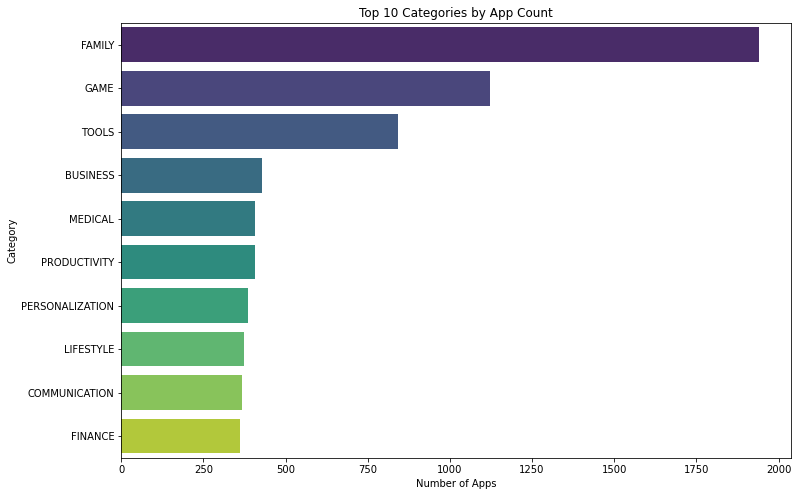

In [22]:
# Top 10 categories by app count
plt.figure(figsize=(12, 8))
category_counts = google_play_data['Category'].value_counts().head(10)
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Top 10 Categories by App Count')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

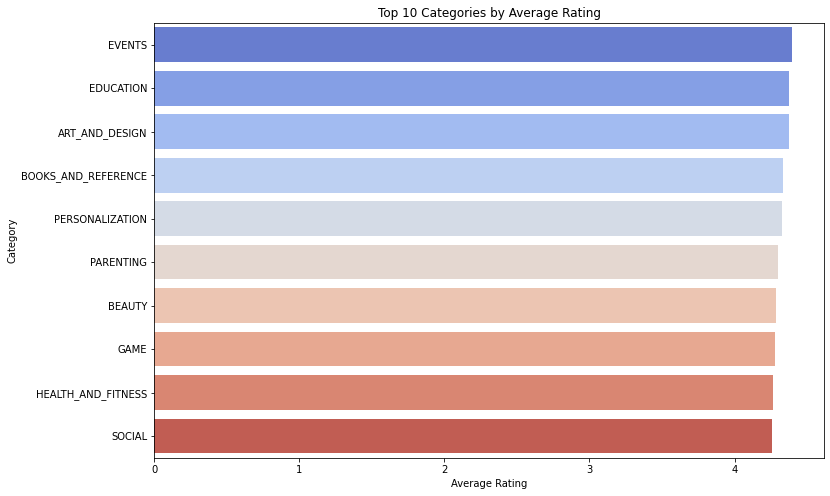

In [23]:
# Top 10 categories by average rating
plt.figure(figsize=(12, 8))
avg_rating_by_category = google_play_data.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_rating_by_category.values, y=avg_rating_by_category.index, palette='coolwarm')
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

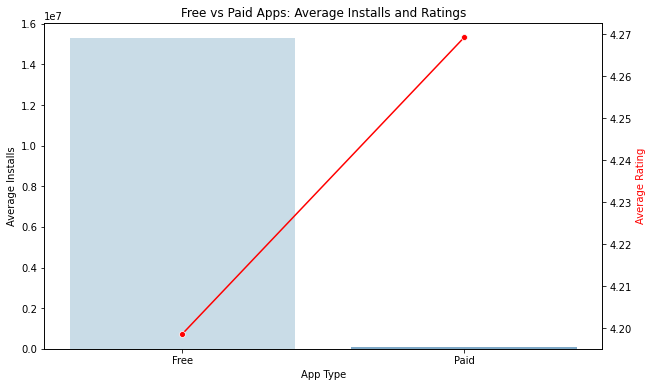

In [24]:
# Visualizing free vs. paid apps comparison
free_vs_paid = google_play_data.groupby('Type').agg(
    avg_installs=('Installs', 'mean'),
    avg_rating=('Rating', 'mean')
).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for average installs
sns.barplot(x='Type', y='avg_installs', data=free_vs_paid, ax=ax1, palette='Blues', alpha=0.7)
ax1.set_title('Free vs Paid Apps: Average Installs and Ratings')
ax1.set_ylabel('Average Installs')
ax1.set_xlabel('App Type')

# Line plot for average ratings
ax2 = ax1.twinx()
sns.lineplot(x='Type', y='avg_rating', data=free_vs_paid, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Average Rating', color='red')

plt.show()

In [25]:
# Top 10 apps by installs
plt.figure(figsize=(12, 8))
top_installed_apps = google_play_data[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(10)
sns.barplot(x='Installs', y='App', data=top_installed_apps, palette='summer')
plt.title('Top 10 Apps by Installs')
plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.show()`

SyntaxError: invalid syntax (<ipython-input-25-a0a241c4ad04>, line 8)